# 65. Calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes 

In [105]:
#65.  Calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes 
# Merge the two tables on ID
import pandas as pd
import matplotlib.pyplot as plt

sub_info=pd.read_csv("subject-info.csv")
measure=pd.read_csv("test_measure.csv")

merged_data = pd.merge(sub_info, measure, on='ID')

# Step 1: Get the maximum treadmill speed of female athletes
max_female_speed = merged_data[merged_data['Sex'] == 1]['Speed'].max()
#print(max_female_speed)

# Step 2: Filter male athletes who exceeded this speed
male_exceeding = merged_data[(merged_data['Sex'] == 0) & (merged_data['Speed'] > max_female_speed)]
#print(male_exceeding)

# Step 3: Calculate the percentage
total_male = merged_data[merged_data['Sex'] == 1].shape[0]
percentage = (male_exceeding.shape[0] / total_male) * 100

# Output the result
print(f"Percentage of male athletes exceeding max female speed: {percentage:.2f}%")

Percentage of male athletes exceeding max female speed: 6.13%


# 66. Visualize the number of test taken by participants and their trend of maximum Vo2 level as dual chart ?

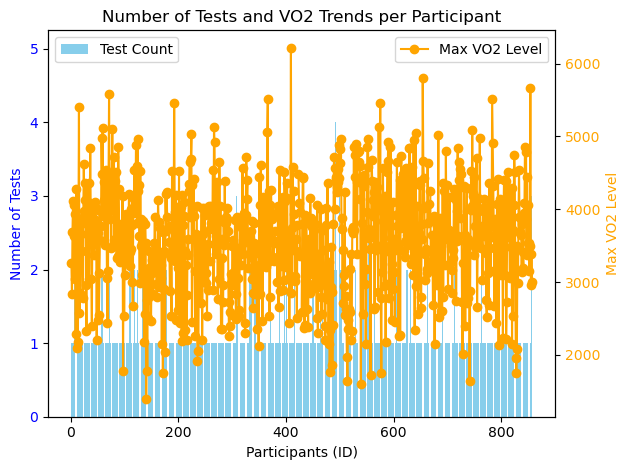

In [107]:
#66.Visualize the number of test taken by participants and their trend of maximum Vo2 level as dual chart ?
# Step 1: Count the number of tests per participant
test_counts = sub_info.groupby('ID').size().reset_index(name='Test_Count')

# Step 2: Calculate the maximum VO2 level for each participant
max_vo2 = measure.groupby('ID')['VO2'].max().reset_index(name='Max_VO2')

# Step 3: Merge the data
merged_data = pd.merge(test_counts, max_vo2, on='ID')

# Step 4: Visualization
fig, ax1 = plt.subplots()

# Bar chart for test counts
ax1.bar(merged_data['ID'], merged_data['Test_Count'], color='skyblue', label='Test Count')
ax1.set_xlabel('Participants (ID)')
ax1.set_ylabel('Number of Tests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Line chart for maximum VO2 trend
ax2 = ax1.twinx()
ax2.plot(merged_data['ID'], merged_data['Max_VO2'], color='orange', marker='o', label='Max VO2 Level')
ax2.set_ylabel('Max VO2 Level', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Titles and legends
plt.title('Number of Tests and VO2 Trends per Participant')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 67. Create violin chart for any two column from the dataset ?

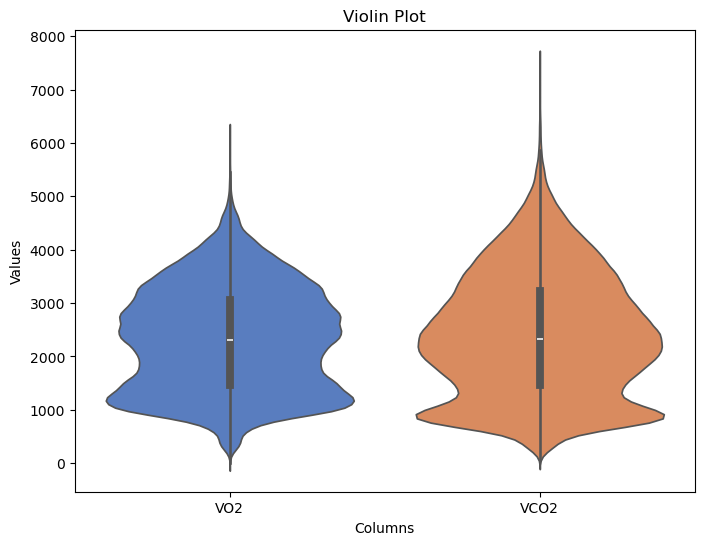

In [15]:
# 67. Create violin chart for any two column from the dataset ?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['VO2', 'VCO2']

# Melt the dataframe for seaborn's violin plot
melted_data = measure[columns_to_plot].melt(var_name='Columns', value_name='Values')

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Columns', y='Values', hue='Columns', data=melted_data, palette='muted', legend=False)

# Add title and labels
plt.title('Violin Plot')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

# 68. calculate BSA (Body surface area) without using function and store as column in dataframe and categorize .

In [115]:
#68. calculate BSA (Body surface area) without using function and store as column in dataframe and categorize . 
import pandas as pd

# Map Height values for rows 1 to 10
height_map = list(map(lambda x: x, sub_info['Height'].values[:10]))

# Map Weight values for rows 1 to 10
weight_map = list(map(lambda x: x, sub_info['Weight'].values[:10]))

# Combine results into a DataFrame
height_weight_data = pd.DataFrame({'Height_data': height_map, 'Weight_data': weight_map})

# Calculate BSA without using a function
height_weight_data['BSA'] = (height_weight_data['Weight_data'] * height_weight_data['Height_data']/ 3600) ** 0.5  # Applying the formula

# Categorize BSA using conditions without defining a function
height_weight_data['BSA_Category'] = 'Medium'  # Default value
height_weight_data.loc[height_weight_data['BSA'] < 1.5, 'BSA_Category'] = 'Small'
height_weight_data.loc[height_weight_data['BSA'] > 2.0, 'BSA_Category'] = 'Large'

# Display the updated DataFrame
print(height_weight_data)

   Height_data  Weight_data       BSA BSA_Category
0        163.0         48.8  1.486457        Small
1        150.0         41.0  1.307032        Small
2        160.0         46.0  1.429841        Small
3        190.0         71.0  1.935774       Medium
4        169.7         53.8  1.592505       Medium
5        171.0         53.4  1.592639       Medium
6        160.0         46.0  1.429841        Small
7        168.9         50.0  1.531611       Medium
8        160.2         47.2  1.449276        Small
9        160.1         49.7  1.486697        Small


# 69.Write a python function that efficiently processes large data into chunks to analyze average heart rate and  maximum oxygen consumption for each test. Print the chunks during processing.

In [61]:
#69.Write a python function that efficiently processes large data into chunks to analyze average heart rate and
# maximum oxygen consumption for each test. Print the chunks during processing.
import pandas as pd

def process_data_in_chunks(file_path, chunk_size):
    """
    Processes large data in chunks to calculate the average heart rate
    and maximum oxygen consumption (VO2) for each test.
    
    Args:
        file_path (str): Path to the CSV file containing the data.
        chunk_size (int): Number of rows per chunk.
        
    Returns:
        pd.DataFrame: A summary DataFrame with average HR and max VO2 for each test.
    """
    results = []

    # Process the file in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Print the current chunk being processed
        print("Processing Chunk:")
        print(chunk)

        # Perform calculations within each chunk
        summary = chunk.groupby('ID_test').agg(
            Average_HR=('HR', 'mean'),  # Average heart rate
            Max_VO2=('VO2', 'max')     # Maximum oxygen consumption
        ).reset_index()

        # Append results to the list
        results.append(summary)

    # Combine all chunk summaries into a single DataFrame
    final_results = pd.concat(results, ignore_index=True)

    # Return the combined summary
    return final_results

file_path = 'test_measure.csv'

# Define chunk size
chunk_size = 1000  

# Call the function
summary_results = process_data_in_chunks(file_path, chunk_size)

# Display the final summarized results
print("\nFinal Summarized Results:")
print(summary_results)

Processing Chunk:
     time  Speed     HR   VO2  VCO2  RR    VE ID_test  ID
0       0    5.0   63.0   478   360  27  13.3     2_1   2
1       2    5.0   75.0   401   295  23  10.3     2_1   2
2       4    5.0   82.0   449   319  29  12.2     2_1   2
3       7    5.0   87.0   461   340  28  12.8     2_1   2
4       9    5.0   92.0   574   417  28  14.6     2_1   2
..    ...    ...    ...   ...   ...  ..   ...     ...  ..
995   687   16.5  196.0  3344  3552  35  83.2     3_1   3
996   688   16.5  196.0  3419  3645  39  87.4     3_1   3
997   689   16.5  197.0  3364  3595  39  87.5     3_1   3
998   690   16.5  197.0  3500  3729  40  90.9     3_1   3
999   692   16.5  197.0  3569  3849  42  96.9     3_1   3

[1000 rows x 9 columns]
Processing Chunk:
      time  Speed     HR   VO2  VCO2  RR     VE ID_test  ID
1000   693   16.6  197.0  3558  3850  45   98.8     3_1   3
1001   694   16.6  197.0  3404  3697  44   94.7     3_1   3
1002   695   16.6  197.0  3524  3852  47   99.7     3_1   3
100

# 70. "How does the body's production of carbon dioxide related to the consumption of oxygen with increasing levels of pulmonary ventilation during GET? Use low, medium, and high bins values for VE to find your observations."

In [73]:
#70. "How does the body's production of carbon dioxide related to the consumption 
# of oxygen with increasing levels of pulmonary ventilation during GET? 
# Use low, medium, and high bins values for VE to find your observations."
import pandas as pd

data = pd.read_csv('test_measure.csv')

# Ensure the table has the required columns: VE, VO2, VCO2
if not all(col in data.columns for col in ['VE', 'VO2', 'VCO2']):
    raise ValueError("Input data must contain 'VE', 'VO2', and 'VCO2' columns.")

# Dynamically bin VE into Low, Medium, and High
data['VE_Bin'] = pd.cut(data['VE'], bins=3, labels=['Low', 'Medium', 'High'])

# Group by VE_Bin and calculate average VO2 and VCO2 for each bin
grouped_data = data.groupby('VE_Bin',observed=False).agg(
    Average_VO2=('VO2', 'mean'),
    Average_VCO2=('VCO2', 'mean')
).reset_index()

# Display grouped observations
print("Grouped Data by VE Bins:")
print(grouped_data)

Grouped Data by VE Bins:
   VE_Bin  Average_VO2  Average_VCO2
0     Low  1655.178750   1548.638533
1  Medium  3042.400724   3310.514378
2    High  4031.003822   4744.958867


## 71. Create a Funnel chart of Age Category (Child, Teen, Adult and Senior) ?

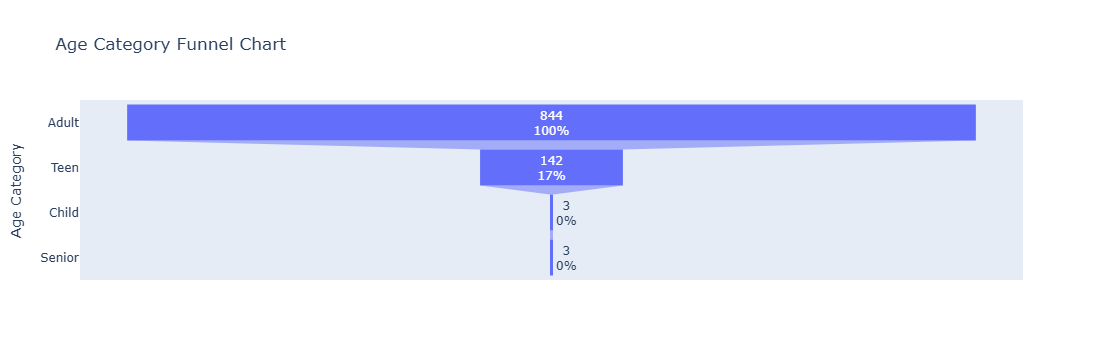

In [83]:
#71. Create a Funnel chart of Age Category (Child, Teen, Adult and Senior) ?
import pandas as pd
import plotly.graph_objects as go

# Load the subject_info CSV file
file_path = 'subject-info.csv' 
data = pd.read_csv(file_path)

# Define age categories and dynamically assign labels
def categorize_age(age):
    if age < 13:
        return 'Child'
    elif 13 <= age < 18:
        return 'Teen'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

data['Age_Category'] = data['Age'].apply(categorize_age)

# Count individuals in each age category
age_counts = data['Age_Category'].value_counts()
categories = age_counts.index.tolist()
counts = age_counts.values.tolist()

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y=categories,
    x=counts,
    textinfo="value+percent initial"  # Display value and percentage of total
))

# Customize layout
fig.update_layout(
    title="Age Category Funnel Chart",
    xaxis_title="Count",
    yaxis_title="Age Category",
)

# Display the chart
fig.show()

# 72. visualize different physiological parameters over time for a specific test of an athlete using multiple panels?

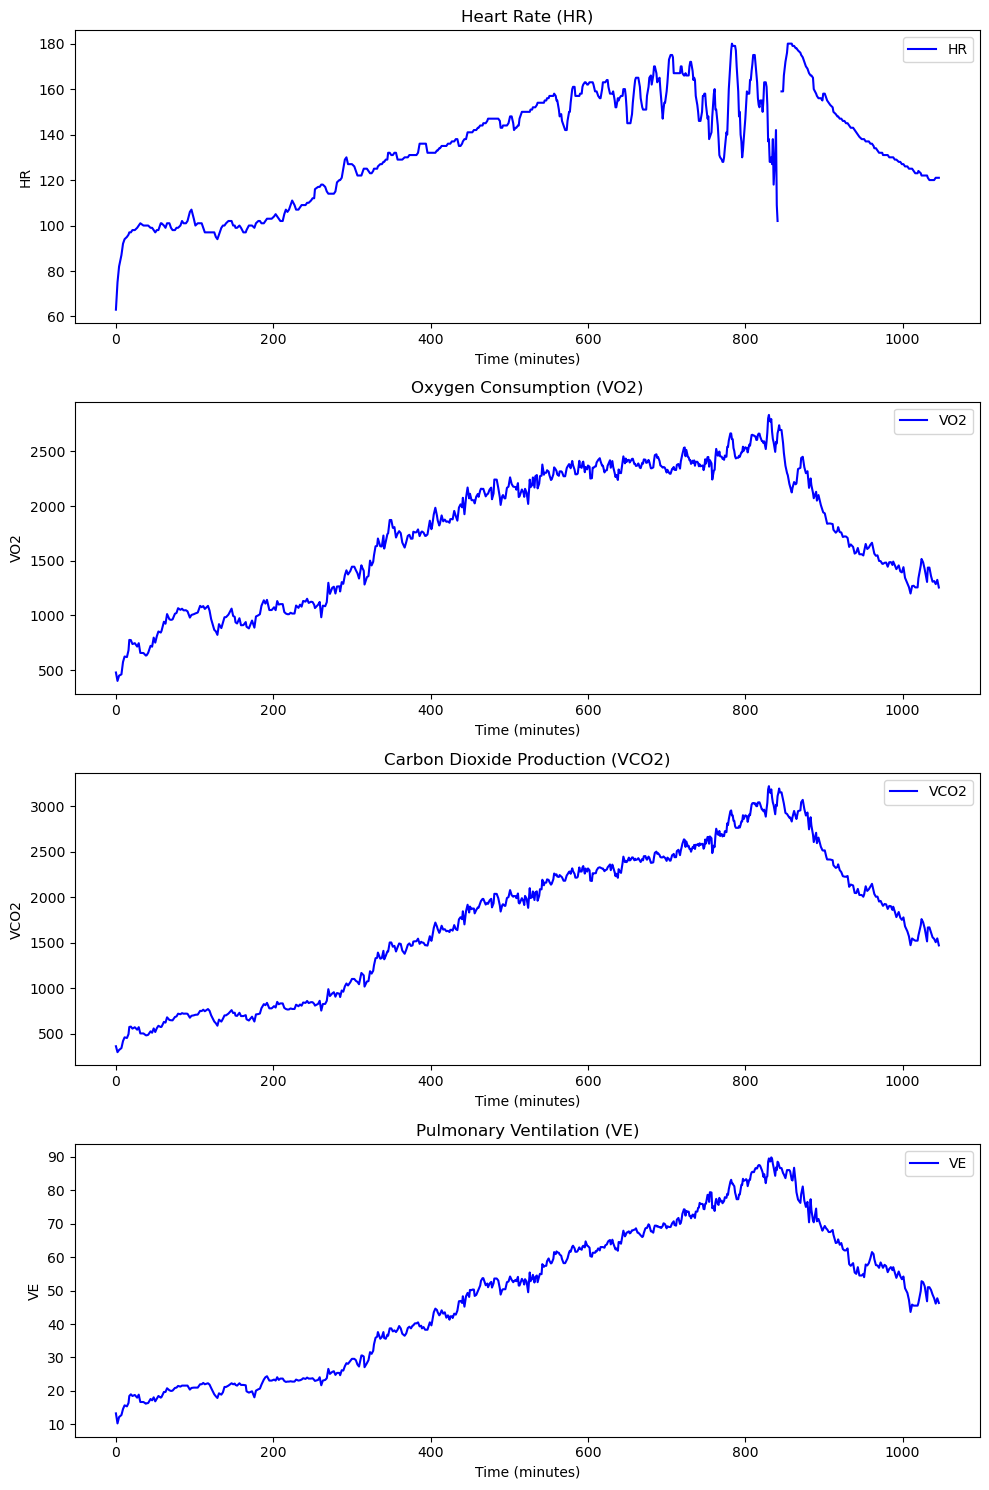

In [7]:
#72. visualize different physiological parameters over time for a specific test of an athlete using multiple panels?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('test_measure.csv')  

# Filter data for the specific test (e.g., Test ID: '2_1')
specific_test_id = '2_1'
test_data = data[data['ID_test'] == specific_test_id]

# Create multi-panel plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 15))
parameters = ['HR', 'VO2', 'VCO2', 'VE']
titles = ['Heart Rate (HR)', 'Oxygen Consumption (VO2)', 'Carbon Dioxide Production (VCO2)', 'Pulmonary Ventilation (VE)']

for i, param in enumerate(parameters):
    axes[i].plot(test_data['time'], test_data[param], label=param, color='blue')
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(param)
    axes[i].set_xlabel('Time (minutes)')
    
    axes[i].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# 73.Print first 10 records of the subject_info based on ID, without using head() method.

In [9]:
#73.Print first 10 records of the subject_info based on ID, without using head() method.
import pandas as pd

# Example DataFrame (replace with your actual data)
subject_info = pd.DataFrame({
    'ID': range(1, 11),  
    'Age': [20 + i for i in range(1, 11)],
    'Height': [150 + i for i in range(1, 11)],
    'Weight': [50 + i for i in range(1, 11)],
    'Humidity': [50 + i for i in range(1, 11)],
    'Temperature': [50 + i for i in range(1, 11)],
    'Sex': [50 + i for i in range(1, 11)]
})

# Sort the DataFrame by ID (if needed)
subject_info = subject_info.sort_values(by='ID')

# Print the first 10 records based on ID using slicing
print(subject_info.loc[subject_info.index[:10]])

   ID  Age  Height  Weight  Humidity  Temperature  Sex
0   1   21     151      51        51           51   51
1   2   22     152      52        52           52   52
2   3   23     153      53        53           53   53
3   4   24     154      54        54           54   54
4   5   25     155      55        55           55   55
5   6   26     156      56        56           56   56
6   7   27     157      57        57           57   57
7   8   28     158      58        58           58   58
8   9   29     159      59        59           59   59


# 74. Determine the treadmill speed range and age range in which you observe the highest average heart rate.

In [15]:
#74. Determine the treadmill speed range and age range in which you observe the highest average heart rate.
import pandas as pd

# Load the datasets
test_measure = pd.read_csv('test_measure.csv')  
subject_info = pd.read_csv('subject-info.csv')  

# Ensure required columns exist
test_required_columns = ['ID_test', 'Speed', 'HR']  # Columns in test_measure
subject_required_columns = ['ID_test', 'Age']    # Columns in subject_info

# Merge the datasets based on subject and test IDs (update join keys as needed)
merged_data = test_measure.merge(subject_info, left_on='ID_test', right_on='ID_test')

# Group by Speed and Age, and calculate average HR
grouped_data = merged_data.groupby(['Speed', 'Age']).agg(Average_HR=('HR', 'mean')).reset_index()

# Find the combination with the highest average HR
highest_hr = grouped_data.loc[grouped_data['Average_HR'].idxmax()]

# Extract ranges
speed_range = highest_hr['Speed']
age_range = highest_hr['Age']
highest_avg_hr = highest_hr['Average_HR']

print("Treadmill Speed Range:", speed_range)
print("Age Range:", age_range)
print(f"Highest Average HR: {highest_avg_hr:.2f}")

Treadmill Speed Range: 16.7
Age Range: 17.9
Highest Average HR: 212.37


# 75.Identify subjects whose heart rate (HR) is consistently above their age group’s 75th percentile.

In [59]:
#75.Identify subjects whose heart rate (HR) is consistently above their age group’s 75th percentile.
import pandas as pd

# Load the datasets
test_measure = pd.read_csv('test_measure.csv')  # Contains HR data
subject_info = pd.read_csv('subject-info.csv')  # Contains Age

# Merge datasets on the common column 'ID_test'
merged_data = test_measure.merge(subject_info, on='ID')

# Group data by Age and calculate the 75th percentile HR for each age group
percentiles = merged_data.groupby('Age')['HR'].quantile(0.75).reset_index()
percentiles.rename(columns={'HR': 'HR_75th_Percentile'}, inplace=True)

# Merge the 75th percentile HR data back to the merged dataset
merged_data = merged_data.merge(percentiles, on='Age')

# Filter rows where HR is consistently above the 75th percentile for their age group
filtered_data = merged_data[merged_data['HR'] > merged_data['HR_75th_Percentile']]

# Group by unique subject IDs ('ID') and summarize results
grouped_by_id = filtered_data.groupby('ID').agg(
    Max_HR=('HR', 'max'),              # Maximum HR above 75th percentile
    Age_Group=('Age', 'unique')        # Unique age group(s)
).reset_index()

# Output the final grouped data
print("Subjects whose HR is consistently above their age group’s 75th percentile:")
print(grouped_by_id)

Subjects whose HR is consistently above their age group’s 75th percentile:
      ID  Max_HR           Age_Group
0      1   180.0              [32.7]
1      2   180.0              [33.8]
2      3   205.0              [16.6]
3      4   192.0              [28.5]
4      5   197.0              [23.4]
..   ...     ...                 ...
829  853   204.0              [16.9]
830  854   175.0              [34.6]
831  855   184.0        [42.9, 42.4]
832  856   178.0  [58.7, 59.1, 59.7]
833  857   214.0              [29.0]

[834 rows x 3 columns]


# 76. list the participants ID and test _ID who started their warm up with speed less than 5km/h ?

In [63]:
# 76. list the participants ID and test _ID who started their warm up with speed less than 5km/h ?
import pandas as pd

# Load the CSV files
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Filter participants with warm-up speed < 5 km/h
filtered_data = test_measure[test_measure['Speed'] < 5][['ID', 'ID_test']]

# Display the result
print(filtered_data)

         ID ID_test
1207      4     4_1
1208      4     4_1
1209      4     4_1
1210      4     4_1
1211      4     4_1
...     ...     ...
574579  856   856_1
574580  856   856_1
574581  856   856_1
574582  856   856_1
574583  856   856_1

[65368 rows x 2 columns]


# 77. Calculate the mean VO2 max for male and female athletes in the Get Phase.

In [71]:
#77. Calculate the mean VO2 max for male and female athletes in the Get Phase.
import pandas as pd

# Load the CSV files
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Step 1: Calculate VO2 max for each participant
# Assuming 'VO2' column exists and 'ID_test' is the identifier
vo2_max_data = test_measure.groupby('ID_test')['VO2'].max().reset_index()
vo2_max_data.rename(columns={'VO2': 'VO2_max'}, inplace=True)

# Step 2: Merge VO2 max data with subject demographic information
# Assuming 'ID_test' is the common column
merged_data = pd.merge(vo2_max_data, subject_info, on='ID_test')

# Step 3: Calculate the mean VO2 max for male and female athletes
mean_vo2_max_by_gender = merged_data.groupby('Sex')['VO2_max'].mean()

# Display the results
print("Mean VO2 max by gender:")
print(mean_vo2_max_by_gender)

Mean VO2 max by gender:
Sex
0    3736.218900
1    2547.737931
Name: VO2_max, dtype: float64


# 78. If you consider cool down time as the recovery period after reaching peak speed, display the participant details who has taken the longest Cool Down time.

In [81]:
#78. If you consider cool down time as the recovery period after reaching peak speed, 
# display the participant details who has taken the longest Cool Down time.
import pandas as pd

# Load the test_measure and subject-info data
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Step 1: Calculate the peak speed (max speed) for each participant
# Assuming 'speed' column contains speed data
peak_speed_data = test_measure.groupby('ID_test')['Speed'].max().reset_index()
peak_speed_data.rename(columns={'Speed': 'peak_speed'}, inplace=True)

# Step 2: Find the participant with the longest cool down time after reaching peak speed
# Merge peak speed data back with the test_measure data
merged_test_data = pd.merge(test_measure, peak_speed_data, on='ID_test')

# Filter for participants who reached peak speed
participants_with_peak_speed = merged_test_data[merged_test_data['Speed'] == merged_test_data['peak_speed']]

# Identify the participant with the longest cool down time
longest_cool_down = participants_with_peak_speed.loc[participants_with_peak_speed['time'].idxmax()]

# Step 3: Get complete participant details from subject-info
participant_details = subject_info[subject_info['ID_test'] == longest_cool_down['ID_test']]

# Display the results
print("Participant details who reached peak speed and took the longest Cool Down time:")
print(participant_details)

Participant details who reached peak speed and took the longest Cool Down time:
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
832  39.7    75.5   180.0      45.0         17.0    0  699   699_1


# 79. Identify the athlete who recorded the highest treadmill speed during the tests.

In [83]:
#79. Identify the athlete who recorded the highest treadmill speed during the tests.
import pandas as pd

# Load the CSV files
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Step 1: Find the maximum treadmill speed and the corresponding participant
max_speed_row = test_measure.loc[test_measure['Speed'].idxmax()]

# Step 2: Retrieve participant details using the ID_test
participant_details = subject_info[subject_info['ID_test'] == max_speed_row['ID_test']]

# Display the results
print("Participant details who recorded the highest treadmill speed:")
print(participant_details)

Participant details who recorded the highest treadmill speed:
      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
148  18.0    63.0   171.0      62.0         22.2    0  431   431_1


# 80. Show the oxygen consumption trend analysis among women athletes across different age groups

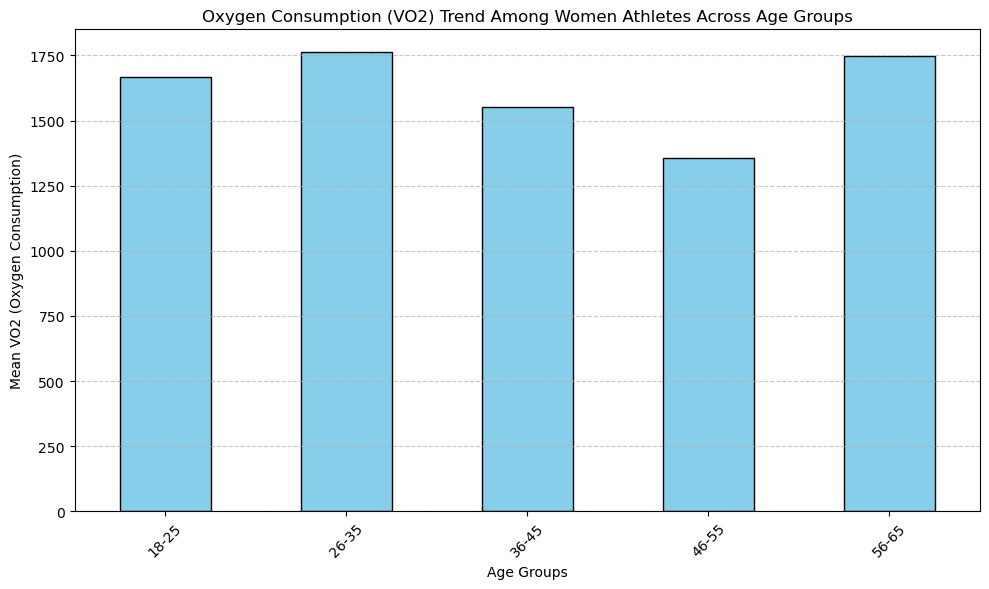

In [103]:
#80. Show the oxygen consumption trend analysis among women athletes across different age groups
import pandas as pd
import matplotlib.pyplot as plt

# Load the data files
test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

# Merge the datasets based on 'ID_test'
merged_data = pd.merge(test_measure, subject_info, on='ID_test')

# Filter for women athletes (Sex == 'Female') and make a copy to avoid the warning
women_data = merged_data[merged_data['Sex'] == 1].copy()

# Categorize age groups (e.g., 18-25, 26-35, etc.)
bins = [18, 25, 35, 45, 55, 65]  # Define age bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']  # Age group labels
women_data['Age_Group'] = pd.cut(women_data['Age'], bins=bins, labels=labels)

# Calculate mean VO2 for each age group
vo2_trends = women_data.groupby('Age_Group', observed=False)['VO2'].mean()

# Plot the trend analysis
plt.figure(figsize=(10, 6))
vo2_trends.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Oxygen Consumption (VO2) Trend Among Women Athletes Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Mean VO2 (Oxygen Consumption)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()